<a href="https://colab.research.google.com/github/ArpitRawat07/Zeotap_Assignment/blob/main/Arpit_Rawat_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries and Load Data

In [1]:
!pip install gdown

In [2]:
# Download Customers.csv
!gdown "https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE" -O Customers.csv

Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/Customers.csv
100% 8.54k/8.54k [00:00<00:00, 20.2MB/s]


In [3]:
# Download Products.csv
!gdown "https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0" -O Products.csv

Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/Products.csv
100% 4.25k/4.25k [00:00<00:00, 14.1MB/s]


In [4]:
# Download Transactions.csv
!gdown "https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF" -O Transactions.csv

Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/Transactions.csv
100% 54.7k/54.7k [00:00<00:00, 50.5MB/s]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [6]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

In [7]:
# Convert the 'SignupDate' and 'TransactionDate' columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

## Data Preprocessing

In [8]:
# Aggregating transaction data by customer
transaction_data = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    AvgSpent=('TotalValue', 'mean'),
    PurchaseCount=('TotalValue', 'count')
).reset_index()

In [9]:
# One-hot encode 'Region' column for customers
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
region_encoded = encoder.fit_transform(customers[['Region']])
region_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['Region']))

# Merging customer data with region data
customers = pd.concat([customers, region_df], axis=1)

# Merge transaction data with customer profile data
customer_features = pd.merge(customers, transaction_data, on='CustomerID')

# Drop unnecessary columns for clustering
features = customer_features.drop(columns=['CustomerID', 'CustomerName', 'SignupDate', 'Region'])

In [10]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [62]:
# Performed KMeans clustering with clusters ranging from 2-10 => Best results for 7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(features_scaled)

# Add the cluster labels to the customer_features dataframe
customer_features['Cluster'] = kmeans.labels_

In [63]:
# Calculate Davies-Bouldin Index (DBI) - lower is better
db_index = davies_bouldin_score(features_scaled, kmeans.labels_)

# Calculate Silhouette Score - higher is better
silhouette_avg = silhouette_score(features_scaled, kmeans.labels_)

print(f"DB Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette_avg:.4f}")

DB Index: 0.8535
Silhouette Score: 0.4269


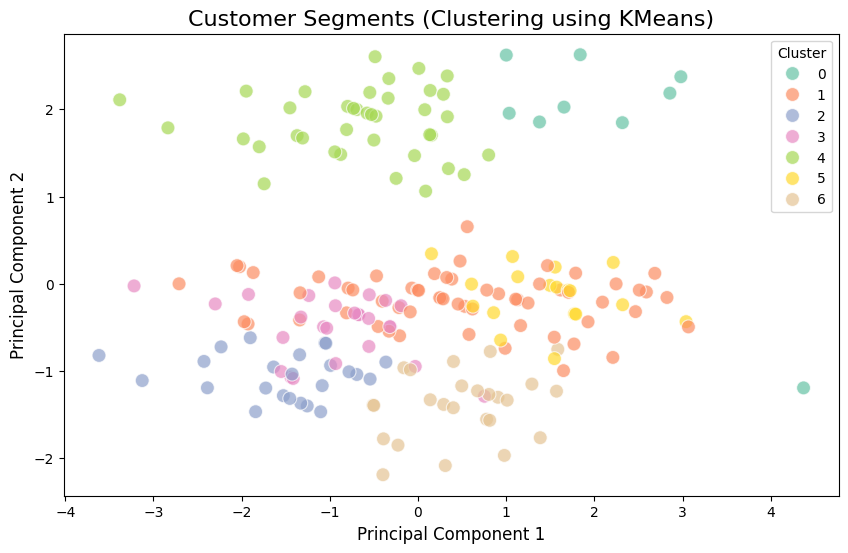

In [64]:
# Reduce the dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=customer_features['Cluster'], palette='Set2', s=100, alpha=0.7)
plt.title('Customer Segments (Clustering using KMeans)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [65]:
# Save the customer features with clusters to a CSV file
customer_features.to_csv("Customer_Clusters.csv", index=False)

In [66]:
# Calculate inertia (within-cluster sum of squared distances) for KMeans
inertia = kmeans.inertia_

print(f"KMeans Inertia: {inertia:.4f}")

KMeans Inertia: 393.9124
